## TO-DO
## 1.이미지 저장되어 있는 폴더에서 가져오는 이미지 수량 동일하게 하기
## 2.모델 생성 할 때 최적 모델 생성하기

In [ ]:
# 런타임 끊김 방지

# function ConnectButton(){
#     console.log("Connect pushed");
#     document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()

# setInterval(ConnectButton,60000);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, cv2
from PIL import Image
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# file_path = "/content/drive/MyDrive/YANG/unzip/images/resize"

# data = []

# # 음식 종류별로 반복
# for food_folder in tqdm(os.listdir(file_path)):
#     food_folder_path = os.path.join(file_path, food_folder)

#     for q_folder in os.listdir(food_folder_path):
#         q_folder_path = os.path.join(food_folder_path, q_folder)
#         quantity_n = int(q_folder.split("Q")[-1])  # 음식 양 정보 추출

#         # crop_side
#         crop_files_side = [f for f in os.listdir(q_folder_path) if f.startswith("crop_side")]
#         random.shuffle(crop_files_side)
#         crop_files_side_selected = crop_files_side[:20]

#         # crop_top
#         crop_files_top = [f for f in os.listdir(q_folder_path) if f.startswith("crop_top")]
#         random.shuffle(crop_files_top)
#         crop_files_top_selected = crop_files_top[:20]

#         # crop_files_side와 crop_files_top를 합치기
#         merged_files = crop_files_side_selected + crop_files_top_selected

#         # 파일 수가 충분하지 않으면 건너뜀
#         if len(crop_files_side_selected) < 20 or len(crop_files_top_selected) < 20:
#             continue

#         # 파일 수가 충분하면 가져와서 data에 추가
#         for img_file in merged_files:
#             filename = img_file
#             filepath = os.path.join(q_folder_path, img_file)
#             data.append({"filename": filename, "filepath": filepath, "quantity": quantity_n})

# # 결과 확인
# print("Total images:", len(data))

100%|██████████| 83/83 [02:49<00:00,  2.04s/it]

Total images: 16600


In [ ]:
# data

[{'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00053_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00053_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00043_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00043_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00030_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00030_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00049_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00049_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00047_

In [ ]:
# len(data)

16600

In [ ]:
# merged_files

['crop_side_어육류면적_접시_훈제오리_Q5_00030_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00047_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00001_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00024_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00014_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00008_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00055_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00050_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00052_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00013_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00003_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00023_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00053_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00029_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00038_resized.jpg',
 'crop_side_어육류면적

In [ ]:
# crop_files_side

['crop_side_어육류면적_접시_훈제오리_Q5_00030_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00047_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00001_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00024_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00014_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00008_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00055_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00050_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00052_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00013_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00003_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00023_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00053_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00029_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00038_resized.jpg',
 'crop_side_어육류면적

In [ ]:
# crop_files_side_selected

['crop_side_어육류면적_접시_훈제오리_Q5_00030_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00047_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00001_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00024_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00014_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00008_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00055_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00050_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00052_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00013_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00003_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00023_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00053_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00029_resized.jpg',
 'crop_side_어육류면적_접시_훈제오리_Q5_00038_resized.jpg',
 'crop_side_어육류면적

In [ ]:
# crop_files_top

['crop_top_어육류면적_접시_훈제오리_Q5_00012_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00007_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00032_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00001_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00048_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00009_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00037_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00046_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00008_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00022_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00013_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00024_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00044_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00017_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00020_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리

In [ ]:
# crop_files_top_selected

['crop_top_어육류면적_접시_훈제오리_Q5_00012_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00007_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00032_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00001_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00048_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00009_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00037_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00046_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00008_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00022_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00013_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00024_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00044_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00017_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리_Q5_00020_resized.jpg',
 'crop_top_어육류면적_접시_훈제오리

In [ ]:
file_path = "/content/drive/MyDrive/YANG/unzip/images/resize"

data = []

# 음식 종류별로 반복
for food_folder in tqdm(os.listdir(file_path)):
    food_folder_path = os.path.join(file_path, food_folder)
    food_data = []  # 각 음식에 대한 데이터를 임시로 저장할 리스트

    for q_folder in os.listdir(food_folder_path):
        q_folder_path = os.path.join(food_folder_path, q_folder)
        quantity_n = int(q_folder.split("Q")[-1])  # 음식 양 정보 추출

        # crop_side
        crop_files_side = [f for f in os.listdir(q_folder_path) if f.startswith("crop_side")]
        random.shuffle(crop_files_side)
        crop_files_side_selected = crop_files_side[:20]

        # crop_top
        crop_files_top = [f for f in os.listdir(q_folder_path) if f.startswith("crop_top")]
        random.shuffle(crop_files_top)
        crop_files_top_selected = crop_files_top[:20]

        # crop_files_side와 crop_files_top를 합치기
        merged_files = crop_files_side_selected + crop_files_top_selected

        # 파일 수가 충분하지 않으면 건너뜀
        if len(crop_files_side_selected) < 20 or len(crop_files_top_selected) < 20:
            continue

        # 파일 수가 충분하면 가져와서 food_data에 추가
        for img_file in merged_files:
            filename = img_file
            filepath = os.path.join(q_folder_path, img_file)
            food_data.append({"filename": filename, "filepath": filepath, "quantity": quantity_n})

    # 해당 음식에 대한 데이터를 전체 데이터에 추가
    data.extend(food_data)

# 결과 확인
print("Total images:", len(data))


100%|██████████| 83/83 [02:07<00:00,  1.54s/it]

Total images: 16600


In [ ]:
data

[{'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00047_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00047_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00053_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00053_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00042_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00042_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00006_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00006_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00020_

In [ ]:
# 데이터프레임으로 변환
df = pd.DataFrame(data)

# CSV 파일로 저장 (UTF-8 인코딩)
df.to_csv('/content/drive/MyDrive/2.양추정/data_twe.csv', index=False, encoding='utf-8')

In [ ]:
df

,filename,filepath,quantity
0,crop_side_건더기국류_뚝배기_갈비탕_Q1_000...,/content/drive/MyDrive/YANG/unzip/images/resiz...,1
1,crop_side_건더기국류_뚝배기_갈비탕_Q1_000...,/content/drive/MyDrive/YANG/unzip/images/resiz...,1
2,crop_side_건더기국류_뚝배기_갈비탕_Q1_000...,/content/drive/MyDrive/YANG/unzip/images/resiz...,1
3,crop_side_건더기국류_뚝배기_갈비탕_Q1_000...,/content/drive/MyDrive/YANG/unzip/images/resiz...,1
4,crop_side_건더기국류_뚝배기_갈비탕_Q1_000...,/content/drive/MyDrive/YANG/unzip/images/resiz...,1
...,...,...,...
16595,crop_top_어육류면적_접시_훈제오리_Q5_0004...,/content/drive/MyDrive/YANG/unzip/images/resiz...,5
16596,crop_top_어육류면적_접시_훈제오리_Q5_0003...,/content/drive/MyDrive/YANG/unzip/images/resiz...,5
16597,crop_top_어육류면적_접시_훈제오리_Q5_0005...,/content/drive/MyDrive/YANG/unzip/images/resiz...,5
16598,crop_top_어육류면적_접시_훈제오리_Q5_0002...,/content/drive/MyDrive/YANG/unzip/images/resiz...,5


In [ ]:
food_data

[{'filename': 'crop_side_어육류면적_접시_훈제오리_Q1_00028_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/훈제오리/Q1/crop_side_어육류면적_접시_훈제오리_Q1_00028_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_어육류면적_접시_훈제오리_Q1_00054_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/훈제오리/Q1/crop_side_어육류면적_접시_훈제오리_Q1_00054_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_어육류면적_접시_훈제오리_Q1_00002_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/훈제오리/Q1/crop_side_어육류면적_접시_훈제오리_Q1_00002_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_어육류면적_접시_훈제오리_Q1_00042_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/훈제오리/Q1/crop_side_어육류면적_접시_훈제오리_Q1_00042_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_어육류면적_접시_훈제오리_Q1_00

In [ ]:
#X.shape(16600, 224, 224, 3)
X = []

for item in tqdm(data):
  img = cv2.imread(item['filepath'])
  X.append(img)

X = np.array(X)
print("X shape:", X.shape)

100%|██████████| 16600/16600 [3:56:38<00:00,  1.17it/s]


X shape: (16600, 224, 224, 3)


In [ ]:
#y.shape(16600,)
y = []

for item in tqdm(data):
  y.append(item['quantity'])

y = np.array(y)
print("y shape:", y.shape)

100%|██████████| 16600/16600 [00:00<00:00, 2203964.62it/s]

y shape: (16600,)


In [ ]:
# #나중을 위해 배열 정보 저장
# np.save('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/X_data_612.npy', X)
# np.save('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/y_data_612.npy', y)

# 데이터를 불러오기
X_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/X_data_612.npy')
y_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/y_data_612.npy')

print("X_loaded shape:", X_loaded.shape)
print("y_loaded shape:", y_loaded.shape)

X_loaded shape: (16600, 224, 224, 3)
y_loaded shape: (16600,)


In [ ]:
# c = X_loaded/255.0
# X_type = c.astype(np.float32)

# X_new_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/X_data_612_new.npy')
# print("X_new_loaded shape:", X_new_loaded.shape)

In [ ]:
X_loaded.shape[0]

16600

In [ ]:
X_loaded[0].shape

(224, 224, 3)

array([[[240, 234, 235],
        [240, 234, 235],
        [240, 234, 235],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       [[240, 234, 235],
        [240, 234, 235],
        [240, 234, 235],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       [[240, 234, 235],
        [240, 234, 235],
        [240, 234, 235],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
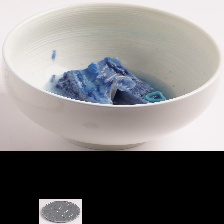

In [ ]:
X_loaded[0]

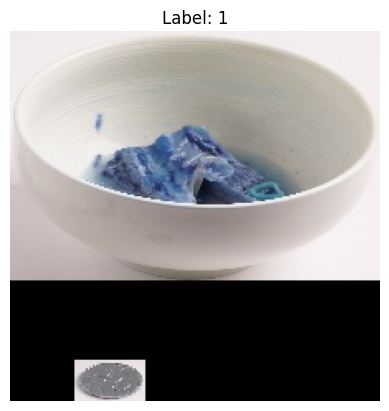

In [ ]:
plt.imshow(X_loaded[0])
plt.title('Label: ' + str(y_loaded[0]))
plt.axis('off') # 축 제거
plt.show()

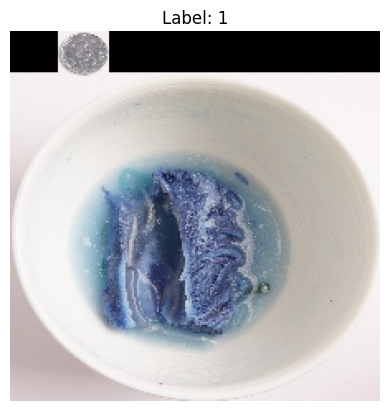

In [ ]:
plt.imshow(X_loaded[22])
plt.title('Label: ' + str(y_loaded[0]))
plt.axis('off') # 축 제거
plt.show()

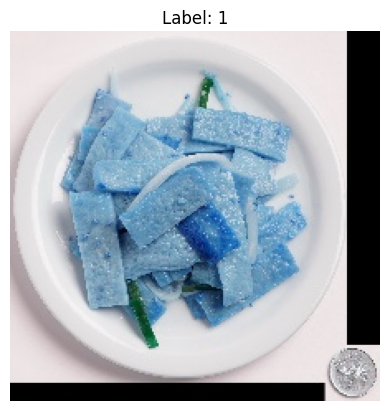

In [ ]:
plt.imshow(X_loaded[9999])
plt.title('Label: ' + str(y_loaded[0]))
plt.axis('off') # 축 제거
plt.show()

In [ ]:
#라벨(1~5) 확인하기
a = np.unique(y)
a

array([1, 2, 3, 4, 5])

In [ ]:
#원-핫 인코딩
YY = pd.get_dummies(y)
YY

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
16595,False,False,False,False,True
16596,False,False,False,False,True
16597,False,False,False,False,True
16598,False,False,False,False,True


In [ ]:
#train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
#test 데이터 크기: (3320, 224, 224, 3) (3320, 5)

X_train, X_test, y_train, y_test = train_test_split(X, YY, test_size=0.2, shuffle=True, stratify=y, random_state=42)

print("train 데이터 크기:", X_train.shape, y_train.shape)
print("test 데이터 크기:", X_test.shape, y_test.shape)

train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
test 데이터 크기: (3320, 224, 224, 3) (3320, 5)


In [ ]:
#model-1
#Conv2D(32, 64, 128)-각각 Maxpooling2D(2,2) + Dropout(0.25) 진행
#Dense(128,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#patience=5 검증손실 5번 연속 개선되지 않으면 멈추기
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 54, 54, 64)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6154 - accuracy: 0.2066
Epoch 2: val_loss did not improve from 1.61019
238/238 [==============================] - 12s 51ms/step - loss: 1.6155 - accuracy: 0.2065 - val_loss: 1.6110 - val_accuracy: 0.1964
Epoch 3/100
237/238 [============================>.] - ETA: 0s - loss: 1.6114 - accuracy: 0.2066
Epoch 3: val_loss improved from 1.61019 to 1.61011, saving model to model_checkpoint.h5
238/238 [==============================] - 12s 53ms/step - loss: 1.6114 - accuracy: 0.2064 - val_loss: 1.6101 - val_accuracy: 0.2033
Epoch 4/100
237/238 [============================>.] - ETA: 0s - loss: 1.6103 - accuracy: 0.2097
Epoch 4: val_loss did not improve from 1.61011
238/238 [==============================] - 12s 51ms/step - loss: 1.6103 - accuracy: 0.2096 - val_loss: 1.6121 - val_accuracy: 0.2072
Epoch 5/100
237/238 [============================>.] - ETA: 0s - loss: 1.6045 - accuracy: 0.2276
Epoch 5: val_loss did not improve from 1.61

In [ ]:
#model-2 (8)
#layer 2개에서 Maxpooling2D(2,2) + Dropout(0.25) 삭제
#Dense(128,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

#layer Conv2D 추가
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 109, 109, 128)     0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 109, 109, 128)     0         
                                                                 
 flatten_2 (Flatten)         (None, 1520768)           0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


238/238 [==============================] - 101s 303ms/step - loss: 155.4911 - accuracy: 0.1954 - val_loss: 1.6100 - val_accuracy: 0.2021
Epoch 2/100
238/238 [==============================] - ETA: 0s - loss: 1.5726 - accuracy: 0.2807
Epoch 2: val_loss did not improve from 1.60996
238/238 [==============================] - 63s 263ms/step - loss: 1.5726 - accuracy: 0.2807 - val_loss: 1.6256 - val_accuracy: 0.2015
Epoch 3/100
238/238 [==============================] - ETA: 0s - loss: 1.4130 - accuracy: 0.3945
Epoch 3: val_loss did not improve from 1.60996
238/238 [==============================] - 62s 263ms/step - loss: 1.4130 - accuracy: 0.3945 - val_loss: 1.6940 - val_accuracy: 0.2039
Epoch 4/100
238/238 [==============================] - ETA: 0s - loss: 1.1667 - accuracy: 0.5369
Epoch 4: val_loss did not improve from 1.60996
238/238 [==============================] - 63s 263ms/step - loss: 1.1667 - accuracy: 0.5369 - val_loss: 1.8729 - val_accuracy: 0.2163
Epoch 5/100
238/238 [========

In [ ]:
#model-3
#Conv2D 1개 layer에서 Maxpooling2D(2,2) + Dropout(0.25) 삭제
#Dense(128,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-3.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


238/238 [==============================] - 36s 138ms/step - loss: 55.1665 - accuracy: 0.1970 - val_loss: 1.6096 - val_accuracy: 0.1940
Epoch 2/100
237/238 [============================>.] - ETA: 0s - loss: 1.6104 - accuracy: 0.2087
Epoch 2: val_loss did not improve from 1.60962
238/238 [==============================] - 31s 129ms/step - loss: 1.6104 - accuracy: 0.2085 - val_loss: 1.6098 - val_accuracy: 0.1955
Epoch 3/100
237/238 [============================>.] - ETA: 0s - loss: 1.6075 - accuracy: 0.2234
Epoch 3: val_loss did not improve from 1.60962
238/238 [==============================] - 31s 129ms/step - loss: 1.6075 - accuracy: 0.2235 - val_loss: 1.6112 - val_accuracy: 0.1880
Epoch 4/100
237/238 [============================>.] - ETA: 0s - loss: 1.5889 - accuracy: 0.2525
Epoch 4: val_loss did not improve from 1.60962
238/238 [==============================] - 31s 129ms/step - loss: 1.5888 - accuracy: 0.2526 - val_loss: 1.6235 - val_accuracy: 0.2078
Epoch 5/100
237/238 [==========

In [ ]:
#model-4
#Conv2D(128, 64, 32)-각각 Maxpooling2D(2,2) + Dropout(0.25) 진행
#Dense(128,3)
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-4.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 111, 111, 128)     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 54, 54, 64)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6097 - accuracy: 0.1974
Epoch 2: val_loss did not improve from 1.60923
238/238 [==============================] - 29s 121ms/step - loss: 1.6097 - accuracy: 0.1974 - val_loss: 1.6094 - val_accuracy: 0.1961
Epoch 3/100
237/238 [============================>.] - ETA: 0s - loss: 1.6095 - accuracy: 0.2018
Epoch 3: val_loss did not improve from 1.60923
238/238 [==============================] - 29s 121ms/step - loss: 1.6095 - accuracy: 0.2018 - val_loss: 1.6095 - val_accuracy: 0.1952
Epoch 4/100
237/238 [============================>.] - ETA: 0s - loss: 1.6099 - accuracy: 0.1930
Epoch 4: val_loss did not improve from 1.60923
238/238 [==============================] - 29s 121ms/step - loss: 1.6099 - accuracy: 0.1932 - val_loss: 1.6096 - val_accuracy: 0.1946
Epoch 5/100
237/238 [============================>.] - ETA: 0s - loss: 1.6095 - accuracy: 0.2017
Epoch 5: val_loss did not improve from 1.60923
238/238 [=========================

In [ ]:
#model-5
#Conv2D(32, 128, 64)-각각 Maxpooling2D(2,2) + Dropout(0.25) 진행
#Dense(128,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-5.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 54, 54, 128)      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6098 - accuracy: 0.2080
Epoch 2: val_loss did not improve from 1.60962
238/238 [==============================] - 15s 65ms/step - loss: 1.6098 - accuracy: 0.2078 - val_loss: 1.6101 - val_accuracy: 0.1919
Epoch 3/100
237/238 [============================>.] - ETA: 0s - loss: 1.6075 - accuracy: 0.2128
Epoch 3: val_loss did not improve from 1.60962
238/238 [==============================] - 15s 65ms/step - loss: 1.6075 - accuracy: 0.2129 - val_loss: 1.6103 - val_accuracy: 0.1937
Epoch 4/100
237/238 [============================>.] - ETA: 0s - loss: 1.6040 - accuracy: 0.2249
Epoch 4: val_loss did not improve from 1.60962
238/238 [==============================] - 15s 64ms/step - loss: 1.6040 - accuracy: 0.2249 - val_loss: 1.6132 - val_accuracy: 0.1931
Epoch 5/100
237/238 [============================>.] - ETA: 0s - loss: 1.5970 - accuracy: 0.2407
Epoch 5: val_loss did not improve from 1.60962
238/238 [============================



---

20240613 model6~

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, cv2
from PIL import Image
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 데이터를 불러오기
X_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/X_data_612.npy')
y_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/y_data_612.npy')

print("X_loaded shape:", X_loaded.shape)
print("y_loaded shape:", y_loaded.shape)

X_loaded shape: (16600, 224, 224, 3)
y_loaded shape: (16600,)


In [ ]:
#라벨(1~5) 확인하기
a = np.unique(y_loaded)
a

array([1, 2, 3, 4, 5])

In [ ]:
#원-핫 인코딩
y = pd.get_dummies(y_loaded)
y

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
16595,False,False,False,False,True
16596,False,False,False,False,True
16597,False,False,False,False,True
16598,False,False,False,False,True


In [ ]:
#train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
#test 데이터 크기: (3320, 224, 224, 3) (3320, 5)

X_train, X_test, y_train, y_test = train_test_split(X_loaded, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

print("train 데이터 크기:", X_train.shape, y_train.shape)
print("test 데이터 크기:", X_test.shape, y_test.shape)

train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
test 데이터 크기: (3320, 224, 224, 3) (3320, 5)


In [ ]:
#model-6-1__model-5 변형하기
#1.optimizer adam -> sgd

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-6-1.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 54, 54, 128)      

KeyboardInterrupt: 

In [ ]:
#model-13
#1.optimizer adam으로 원복
#2.Conv2D layer 1개 추가

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-7.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 54, 54, 128)      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6117 - accuracy: 0.1946
Epoch 2: val_loss improved from 1.60990 to 1.60977, saving model to model_checkpoint_model5-7.h5
238/238 [==============================] - 17s 70ms/step - loss: 1.6117 - accuracy: 0.1946 - val_loss: 1.6098 - val_accuracy: 0.1970
Epoch 3/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6099 - accuracy: 0.2047
Epoch 3: val_loss did not improve from 1.60977
238/238 [==============================] - 17s 70ms/step - loss: 1.6099 - accuracy: 0.2046 - val_loss: 1.6098 - val_accuracy: 0.1979
Epoch 4/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6100 - accuracy: 0.1959
Epoch 4: val_loss did not improve from 1.60977
238/238 [==============================] - 17s 70ms/step - loss: 1.6100 - accuracy: 0.1958 - val_loss: 1.6099 - val_accuracy: 0.1952
Epoch 5/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6101 - accuracy: 0.2009
Epoch 5: val_loss did not impro



---

자료 정리후 다시 시작

In [ ]:
#model-14
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-13.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 128)       0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6102 - accuracy: 0.1985
Epoch 2: val_loss did not improve from 1.60965
238/238 [==============================] - 23s 96ms/step - loss: 1.6102 - accuracy: 0.1985 - val_loss: 1.6098 - val_accuracy: 0.1946
Epoch 3/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6098 - accuracy: 0.1966
Epoch 3: val_loss did not improve from 1.60965
238/238 [==============================] - 23s 96ms/step - loss: 1.6098 - accuracy: 0.1966 - val_loss: 1.6100 - val_accuracy: 0.1928
Epoch 4/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6105 - accuracy: 0.2077
Epoch 4: val_loss did not improve from 1.60965
238/238 [==============================] - 23s 96ms/step - loss: 1.6105 - accuracy: 0.2076 - val_loss: 1.6097 - val_accuracy: 0.1958
Epoch 5/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6101 - accuracy: 0.1993
Epoch 5: val_loss did not improve from 1.60965
238/238 [=========================

In [ ]:
#model-15
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

#layer Conv2D 추가
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-15.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 54, 54, 128)      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6095 - accuracy: 0.1979
Epoch 2: val_loss did not improve from 1.60961
238/238 [==============================] - 23s 98ms/step - loss: 1.6095 - accuracy: 0.1980 - val_loss: 1.6097 - val_accuracy: 0.1943
Epoch 3/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6096 - accuracy: 0.1955
Epoch 3: val_loss did not improve from 1.60961
238/238 [==============================] - 23s 98ms/step - loss: 1.6096 - accuracy: 0.1956 - val_loss: 1.6096 - val_accuracy: 0.1943
Epoch 4/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6096 - accuracy: 0.2018
Epoch 4: val_loss did not improve from 1.60961
238/238 [==============================] - 23s 98ms/step - loss: 1.6096 - accuracy: 0.2019 - val_loss: 1.6097 - val_accuracy: 0.1943
Epoch 5/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6095 - accuracy: 0.2019
Epoch 5: val_loss did not improve from 1.60961
238/238 [=========================



---
점심시간 이후


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, cv2
from PIL import Image
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# 데이터를 불러오기
X_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/X_data_612.npy')
y_loaded = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/y_data_612.npy')

print("X_loaded shape:", X_loaded.shape)
print("y_loaded shape:", y_loaded.shape)

X_loaded shape: (16600, 224, 224, 3)
y_loaded shape: (16600,)


In [4]:
#라벨(1~5) 확인하기
a = np.unique(y_loaded)
a

array([1, 2, 3, 4, 5])

In [5]:
#원-핫 인코딩
y = pd.get_dummies(y_loaded)
y

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
16595,False,False,False,False,True
16596,False,False,False,False,True
16597,False,False,False,False,True
16598,False,False,False,False,True


In [6]:
#train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
#test 데이터 크기: (3320, 224, 224, 3) (3320, 5)

X_train, X_test, y_train, y_test = train_test_split(X_loaded, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

print("train 데이터 크기:", X_train.shape, y_train.shape)
print("test 데이터 크기:", X_test.shape, y_test.shape)

train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
test 데이터 크기: (3320, 224, 224, 3) (3320, 5)


In [7]:
#model-16
#변경사항: Conv2D, kernel_size 값 변경 및 layer 추가
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint"
checkpoint_path = "model_checkpoint_model5-16.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 53, 53, 32)        0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/238 [============================>.] - ETA: 0s - loss: 1.6113 - accuracy: 0.2032
Epoch 2: val_loss improved from 1.61026 to 1.60988, saving model to model_checkpoint_model5-16.h5
238/238 [==============================] - 10s 41ms/step - loss: 1.6113 - accuracy: 0.2032 - val_loss: 1.6099 - val_accuracy: 0.1976
Epoch 3/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6108 - accuracy: 0.1990
Epoch 3: val_loss improved from 1.60988 to 1.60978, saving model to model_checkpoint_model5-16.h5
238/238 [==============================] - 10s 41ms/step - loss: 1.6107 - accuracy: 0.1992 - val_loss: 1.6098 - val_accuracy: 0.1813
Epoch 4/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6100 - accuracy: 0.2048
Epoch 4: val_loss improved from 1.60978 to 1.60974, saving model to model_checkpoint_model5-16.h5
238/238 [==============================] - 10s 41ms/step - loss: 1.6100 - accuracy: 0.2047 - val_loss: 1.6097 - val_accuracy: 0.1964
Epoch 5/1000
237/238 [====

In [8]:
#model-17
#변경사항: 과적합률 확인후 마지막 Dense Dropout max로 증가 시키려고 했으나 별 차이 없어서 마지막 Dense 변경
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

model.add(Dense(5, activation='softmax'))

model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model5-17.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 56, 56, 32)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


238/238 [==============================] - 23s 61ms/step - loss: 2.5349 - accuracy: 0.1963 - val_loss: 1.6096 - val_accuracy: 0.1961
Epoch 2/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6098 - accuracy: 0.1949
Epoch 2: val_loss improved from 1.60962 to 1.60959, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model5-17.h5
238/238 [==============================] - 11s 48ms/step - loss: 1.6098 - accuracy: 0.1948 - val_loss: 1.6096 - val_accuracy: 0.1961
Epoch 3/1000
238/238 [==============================] - ETA: 0s - loss: 1.6098 - accuracy: 0.1899
Epoch 3: val_loss did not improve from 1.60959
238/238 [==============================] - 10s 44ms/step - loss: 1.6098 - accuracy: 0.1899 - val_loss: 1.6097 - val_accuracy: 0.1970
Epoch 4/1000
237/238 [============================>.] - ETA: 0s - loss: 1.6097 - accuracy: 0.2023
Epoch 4: val_loss did not improve from 1.60959
238/238 [==============================] - 10s 44ms/step - loss: 1.609

In [ ]:
#예측해보자구
y_predict = model.predict(X_test)
pred_1 = np.argmax(y_predict, axis=1)
np_test = np.array(y_test)
real_1 = np.argmax(np_test, axis=1)

print(y_predict)
print(pred_1)
print(np_test)
print(real_1)

In [ ]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=42)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 모델 사용하기
xhat_idx = np.random.choice(X_test.shape[0], 5)
xhat = X_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

In [ ]:
# file_path = "/content/drive/MyDrive/YANG/unzip/images/resize"

# data = []

# # 음식 종류별로 반복
# for food_folder in tqdm(os.listdir(file_path)):
#     food_folder_path = os.path.join(file_path, food_folder)
#     food_images_saved = 0  # 해당 음식 종류에서 저장된 이미지 수 초기화

#     # 음식 양 정보별로 반복
#     for q_folder in os.listdir(food_folder_path):
#         q_folder_path = os.path.join(food_folder_path, q_folder)
#         quantity_n = int(q_folder.split("Q")[-1])  # 음식 양 정보 추출

#         # crop_side 파일 가져오기
#         crop_side_name = "crop_side"
#         crop_folder_path_side = os.path.join(q_folder_path, crop_side_name)
#         crop_files_side = [f for f in os.listdir(crop_folder_path_side) if f.startswith(crop_side_name)]
#         random.shuffle(crop_files_side)
#         crop_files_side_selected = crop_files_side[:20]

#         # crop_top 파일 가져오기
#         crop_top_name = "crop_top"
#         crop_folder_path_top = os.path.join(q_folder_path, crop_top_name)
#         crop_files_top = [f for f in os.listdir(crop_folder_path_top) if f.startswith(crop_top_name)]
#         random.shuffle(crop_files_top)
#         crop_files_top_selected = crop_files_top[:20]

#         # crop_files_side와 crop_files_top를 합치기
#         merged_files = crop_files_side_selected + crop_files_top_selected

#         # 파일 수가 충분하지 않으면 건너뜀
#         if len(crop_files_side_selected) < 20 or len(crop_files_top_selected) < 20:
#             continue

#         # 파일 수가 충분하면 가져와서 data에 추가
#         food_images_saved += 40  # 해당 음식 종류에서 저장된 이미지 수 갱신
#         for img_file in merged_files:
#             filename = img_file
#             filepath = os.path.join(crop_folder_path_side if img_file.startswith("crop_side") else crop_folder_path_top, img_file)
#             data.append({"filename": filename, "filepath": filepath, "quantity": quantity_n})

#     # 해당 음식 종류에 대한 결과 출력
#      print(f"{food_folder}: Q1-{food_images_saved} images saved")

# # 결과 확인
# print("Total images:", len(data))


In [ ]:
# #crop_black img file 사용
# #파일명 crop_side / crop_top 각 20개씩 사진 가져오기
# #사용하는 이미지 수량: 83종 * (음식량 5종 * 총 40장) = 16,600

# #필요한 내용: 파일명, 경로, 양정보, X/y 데이터 np.array 형태, crop_side/crop_top 각 20개씩 사진 가져오기

# file_path = "/content/drive/MyDrive/YANG/unzip/images/resize"

# data = []

# for food_folder in tqdm(os.listdir(file_path)):
#     food_folder_path = os.path.join(file_path, food_folder)

#     for q_folder in os.listdir(food_folder_path):
#         q_folder_path = os.path.join(food_folder_path, q_folder)
#         quantity_n = int(q_folder.split("Q")[-1]) #음식량: 1~5 나타내기

#         # crop_side 파일 가져오기 / startswith: 파일명 시작부분이 내가 원하는데로 파일을 가져올 수 있음
#         crop_side_name = "crop_side"
#         crop_folder_path_side = os.path.join(q_folder_path, crop_side_name)
#         crop_files_side = [f for f in os.listdir(crop_folder_path_side) if f.startswith(crop_side_name)]
#         random.shuffle(crop_files_side)
#         crop_files_side_selected = crop_files_side[:20]

#         # crop_top 파일 가져오기
#         crop_top_name = "crop_top"
#         crop_folder_path_top = os.path.join(q_folder_path, crop_top_name)
#         crop_files_top = [f for f in os.listdir(crop_folder_path_top) if f.startswith(crop_top_name)]
#         random.shuffle(crop_files_top)
#         crop_files_top_selected = crop_files_top[:20]

#         # crop_files_side와 crop_files_top를 합치기
#         merged_files = crop_files_side_selected + crop_files_top_selected

#         # 파일 수가 충분하지 않으면 건너뜀
#         if len(crop_files_side_selected) < 40:
#             continue

#         # 파일 수가 충분하면 가져와서 data에 추가
#         for img_file in merged_files:
#             filename = img_file
#             filepath = os.path.join(crop_folder_path_side if img_file.startswith("crop_side") else crop_folder_path_top, img_file)
#             data.append({"filename": filename, "filepath": filepath, "quantity": quantity_n})

# # 결과 확인
# print("Total images:", len(data))